***Let's connect on*** [Linkedin](https://www.linkedin.com/in/ritesh-kumar-4062a620a/)

# **Hypertension Risk Prediction Model** 

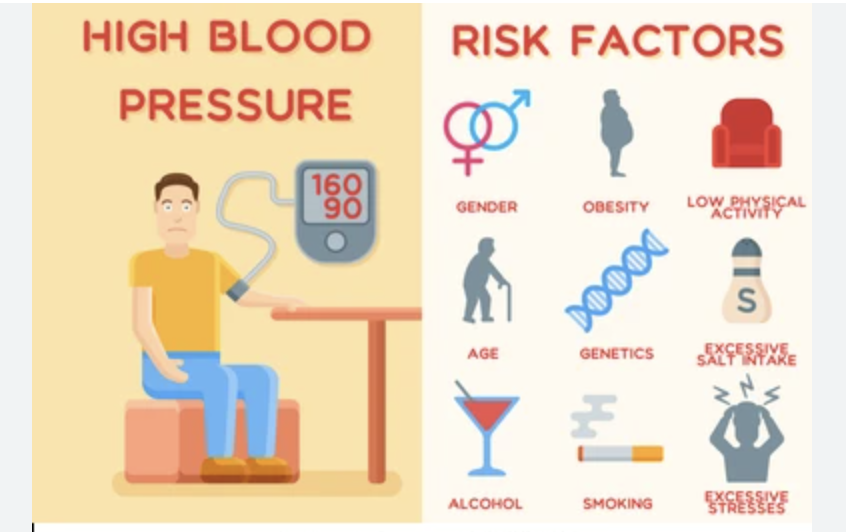

# **Importing libraries**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/riteshkumar/Downloads/ML projects/Hypertension Risk Prediction/Hypertension-risk-model-main.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Loading dataset into pandas dataframe**

In [ ]:
# Importing the dataset into Pandas DataFrame
df = pd.read_csv("/Users/riteshkumar/Downloads/ML projects/Hypertension Risk Prediction/Hypertension-risk-model-main.csv")

In [ ]:
# Displaying first 10 rows of the dataset
df.head()

# **Explore the data** 

In [ ]:
# Displaying datatype of columns
df.info()

In [ ]:
# Displaying the Statistical summary of numerical columns
df.describe()

In [ ]:
# Number of rows and columns
df.shape

In [ ]:
# Checking for null values in the dataset
df.isnull().sum()

In [ ]:
# Calculate the percentage of missing values for each column
missing_values = df.isnull().mean() * 100
print(missing_values)

In [ ]:
# Fill missing values with mean or median
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)

# **Exploratory data analysis**

In [ ]:
# Histograms of all features
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of All Features', fontsize=20)
plt.show()


In [ ]:
# Correlation matrix
plt.figure(figsize=(14, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [ ]:
# Boxplots of features by target variable (Risk)
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.drop('Risk', axis=1).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='Risk', y=column, data=df)
    plt.title(f'Boxplot of {column} by Risk')
plt.tight_layout()
plt.suptitle('Boxplots of Features by Risk', fontsize=20)
plt.subplots_adjust(top=0.95)
plt.show()

# **Splitting the dataset**

In [ ]:
# Split dataset into features and labels
X = df.drop('Risk', axis=1)
y = df['Risk']

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize/scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Training the model using Random Forest Claasifier**

In [ ]:
# Initialize and train model (using Random Forest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# **Predicting the model**

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# **Evaluating the model**

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()